In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("latihan_4_kartu_kredit.csv")
df.head(20)

,pelanggan_id,usia,jenis_kelamin,pendapatan,jml_kartu_kredit,pengeluaran_bulanan,tertarik
0,P001,55,Pria,39451244,1,9464685,1
1,P002,43,Pria,140838825,2,8168362,1
2,P003,50,Pria,104926168,4,5327819,0
3,P004,25,Pria,144813329,2,8284953,0
4,P005,21,Wanita,47606951,2,2255564,1
5,P006,39,Wanita,92056263,2,9514493,1
6,P007,47,Pria,37021862,1,9930264,0
7,P008,30,Pria,142882279,3,5424507,1
8,P009,23,Wanita,38351245,2,3792427,0
9,P010,34,Pria,135945887,1,4357679,0


In [2]:
# Melihat tipe data setiap kolom
df.dtypes

pelanggan_id           object
usia                    int64
jenis_kelamin          object
pendapatan              int64
jml_kartu_kredit        int64
pengeluaran_bulanan     int64
tertarik                int64
dtype: object

In [3]:
# Menampilkan jumlah missing values per kolom
df.isnull().sum()

pelanggan_id           0
usia                   0
jenis_kelamin          0
pendapatan             0
jml_kartu_kredit       0
pengeluaran_bulanan    0
tertarik               0
dtype: int64

In [4]:
print(df.describe())

            usia    pendapatan  jml_kartu_kredit  pengeluaran_bulanan  \
count  50.000000  5.000000e+01         50.000000         5.000000e+01   
mean   35.960000  8.807882e+07          2.600000         5.715496e+06   
std    12.323795  3.906806e+07          1.087968         2.758792e+06   
min    20.000000  3.095396e+07          1.000000         1.318408e+06   
25%    25.000000  4.762807e+07          2.000000         3.313964e+06   
50%    32.500000  8.385470e+07          3.000000         5.407264e+06   
75%    45.000000  1.272148e+08          3.750000         8.116405e+06   
max    59.000000  1.448133e+08          4.000000         9.930264e+06   

        tertarik  
count  50.000000  
mean    0.440000  
std     0.501427  
min     0.000000  
25%     0.000000  
50%     0.000000  
75%     1.000000  
max     1.000000  


In [5]:
le = LabelEncoder()
df['jenis_kelamin'] = le.fit_transform(df['jenis_kelamin'])  # Pria = 1, Wanita = 0

In [6]:
df.drop('pelanggan_id', axis=1, inplace=True)

In [7]:
#Melakukan normalisasi (standarisasi) pada fitur numerik agar memiliki rata-rata 0 
scaler = StandardScaler()
fitur_numerik = ['usia', 'pendapatan', 'jml_kartu_kredit', 'pengeluaran_bulanan']
df[fitur_numerik] = scaler.fit_transform(df[fitur_numerik])

In [8]:
# Pemilihan Fitur & Target
X = df.drop('tertarik', axis=1)
y = df['tertarik']

In [9]:
#Split Data: Training & Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
#Pelatihan Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.50      0.55         6
           1       0.40      0.50      0.44         4

    accuracy                           0.50        10
   macro avg       0.50      0.50      0.49        10
weighted avg       0.52      0.50      0.51        10



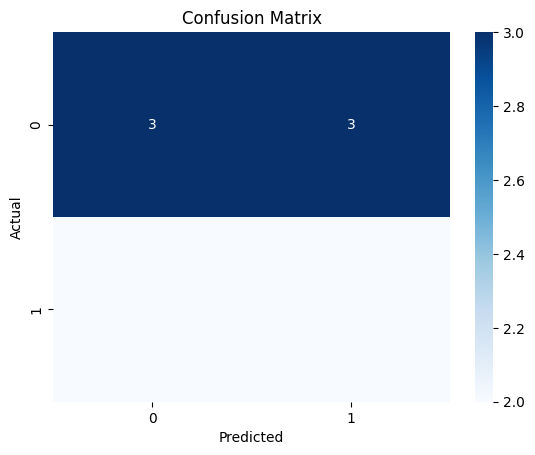

In [11]:
#Evaluasi Model
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Precision kelas 0 lebih tinggi (0.60), artinya model lebih “yakin” saat memprediksi tidak tertarik.

Recall kelas 1 (0.50) cukup baik, artinya separuh dari pelanggan yang tertarik berhasil dikenali.

Namun secara keseluruhan, model belum bisa memisahkan dua kelas dengan baik.

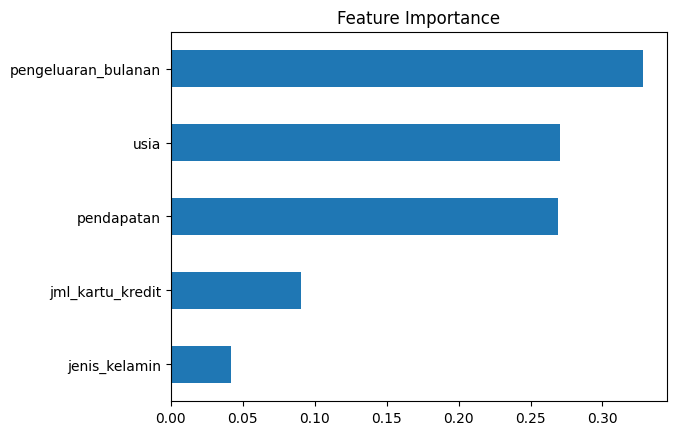

In [13]:
#feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.sort_values().plot(kind='barh')
plt.title("Feature Importance")
plt.show()
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.sort_values().plot(kind='barh')
plt.title("Feature Importance")
plt.show()

Hasil Model
Model Random Forest saat ini hanya mencapai akurasi 50%, belum cukup baik untuk diterapkan.

Performa seimbang antara kelas 0 dan 1, tapi rendah secara keseluruhan.

isebabkan oleh jumlah data terlalu sedikit (hanya 10 data uji) atau data belum cukup informatif.